In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [4]:
dataset = pd.read_csv("Social_Network_Ads.csv")

print(dataset)

description = dataset.describe()

print(f"Description: \n{description}\n")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]
Description: 
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

X: 
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [   

In [5]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[-1.11865155  0.46154547]
 [-1.40137731 -0.12355337]
 [ 1.23739637 -1.3815159 ]
 [-1.40137731 -1.23524118]
 [ 1.80284787 -1.29375107]
 [-0.93016772 -0.44535774]
 [ 0.48346103  1.83652777]
 [-0.2704743   0.02272134]
 [ 0.10649337 -0.32833797]
 [ 0.76618679  0.52005536]
 [-0.2704743  -0.35759291]
 [-1.49561922 -1.52779061]
 [-0.64744197 -1.05971153]
 [ 2.08557362 -0.82567199]
 [ 0.38921912 -0.0065336 ]
 [ 1.80284787  1.5147234 ]
 [ 0.10649337  0.19825099]
 [ 0.10649337  1.86578271]
 [ 0.48346103  1.719508  ]
 [ 0.20073528  2.09982225]
 [-0.93016772  1.54397834]
 [-1.68410306 -1.3815159 ]
 [-1.87258689 -0.76716211]
 [ 0.10649337  1.86578271]
 [ 0.38921912  0.98813444]
 [-1.68410306  0.3445257 ]
 [-1.68410306 -0.62088739]
 [ 0.38921912 -0.15280832]
 [ 0.01225145 -0.59163245]
 [-0.93016772  0.40303559]
 [-1.58986114  0.52005536]
 [-0.2704743   0.13974111]
 [-0.45895814  2.30460684]
 [ 0.95467062  1.42695857]
 [ 0.95467062  1.98280248]
 [-0.08199047 -1.08896647]
 [ 0.76618679 -0.3

In [6]:
def evaluate(classifier, name):
    prediction = classifier.predict(standard_scaler.transform(
    [
        [27, 84000]
    ]
    ))

    print(f"------------ {name} ------------\n")

    print(f"1. Prediction for (27 Age, 84000 Salary): {prediction}\n")

    y_predicted = classifier.predict(X_test)

    print(f"2. y_predicted: \n{y_predicted}\n")

    confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_predicted)

    print(f"3. Confusion matrix: \n{confusion_matrix_result}\n")

    accuracy_score_result = accuracy_score(y_true = y_test, y_pred = y_predicted)

    print(f"4. Accuracy score: {accuracy_score_result}\n")

    classification_report_result = classification_report(y_true = y_test, y_pred = y_predicted)

    print(f"5. Classification report: \n{classification_report_result}\n")

X_set, y_set = standard_scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -10, stop = X_set[:, 0].max()+10, step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))    

def visualize(classifier, name):
    plt.contourf(X1, X2, classifier.predict(standard_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(f"{name} (Test set)")
    plt.xlabel('Age')
    plt.ylabel('Estimeted Salary')
    plt.legend()
    plt.show()

------------ Logistic Regression Classifier ------------

1. Prediction for (27 Age, 84000 Salary): [0]

2. y_predicted: 
[0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0]

3. Confusion matrix: 
[[63  5]
 [11 21]]

4. Accuracy score: 0.84

5. Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        68
           1       0.81      0.66      0.72        32

    accuracy                           0.84       100
   macro avg       0.83      0.79      0.81       100
weighted avg       0.84      0.84      0.84       100




C:\Users\PanCh\AppData\Local\Temp\ipykernel_13516\1993654697.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


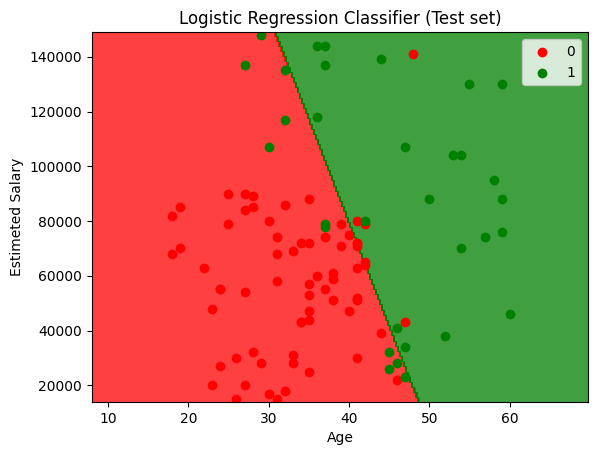

In [7]:
logistic_regression_model = LogisticRegression(random_state = 0)
logistic_regression_model.fit(X_train, y_train)

evaluate(logistic_regression_model, "Logistic Regression Classifier")
visualize(logistic_regression_model, "Logistic Regression Classifier")

------------ Support Vector Classifier (Radial Basis Function Kernel) ------------

1. Prediction for (27 Age, 84000 Salary): [0]

2. y_predicted: 
[1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]

3. Confusion matrix: 
[[64  4]
 [ 3 29]]

4. Accuracy score: 0.93

5. Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100




C:\Users\PanCh\AppData\Local\Temp\ipykernel_13516\1993654697.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


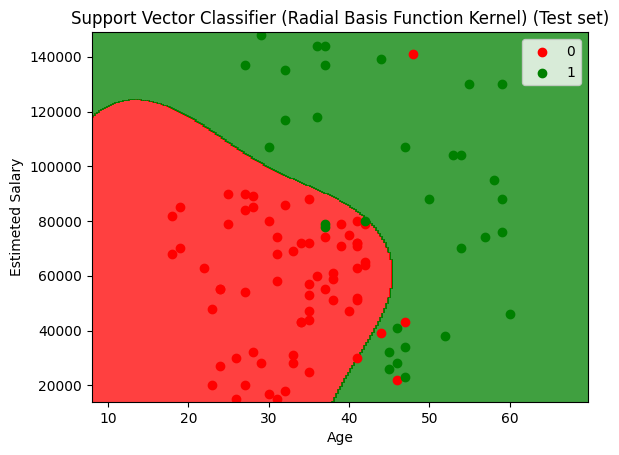

In [8]:
support_vector_classifier = SVC(kernel = "rbf", random_state = 0)
support_vector_classifier.fit(X_train, y_train)

evaluate(support_vector_classifier, "Support Vector Classifier (Radial Basis Function Kernel)")
visualize(support_vector_classifier, "Support Vector Classifier (Radial Basis Function Kernel)")

In [12]:
k_nearest_neighbor_classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
k_nearest_neighbor_classifier.fit(X_train, y_train)

evaluate(k_nearest_neighbor_classifier, "K Nearest Neighbor Classifier ~ Minkowski")
visualize(k_nearest_neighbor_classifier, "K Nearest Neighbor Classifier ~ Minkowski")

------------ K Nearest Neighbor Classifier ~ Minkowski ------------

1. Prediction for (27 Age, 84000 Salary): [0]

2. y_predicted: 
[1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]

3. Confusion matrix: 
[[62  6]
 [ 5 27]]

4. Accuracy score: 0.89

5. Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        68
           1       0.82      0.84      0.83        32

    accuracy                           0.89       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.89      0.89      0.89       100




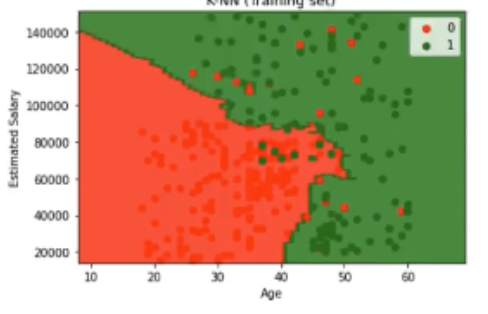

In [11]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

evaluate(naive_bayes_classifier, "Gaussian Naive Bayes Classifier")
visualize(naive_bayes_classifier, "Gaussian Naive Bayes Classifier")

------------ Gaussian Naive Bayes Classifier ------------

1. Prediction for (27 Age, 84000 Salary): [0]

2. y_predicted: 
[1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]

3. Confusion matrix: 
[[65  3]
 [ 5 27]]

4. Accuracy score: 0.92

5. Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.90      0.84      0.87        32

    accuracy                           0.92       100
   macro avg       0.91      0.90      0.91       100
weighted avg       0.92      0.92      0.92       100




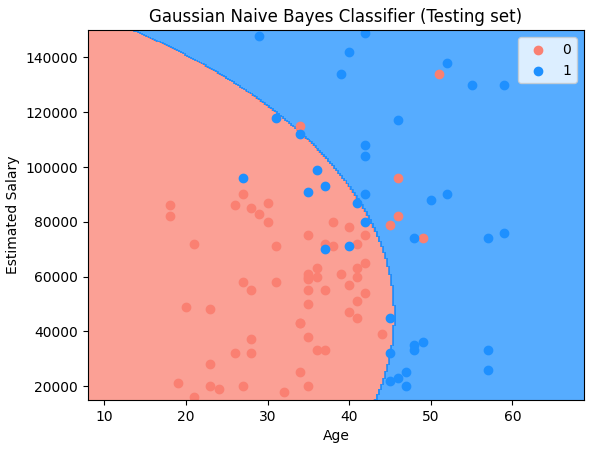

In [13]:
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)

evaluate(decision_tree_classifier, "Decision Tree Classifier (Criterion = entropy, random state = 0)")
visualize(decision_tree_classifier, "Decision Tree Classifier (Criterion = entropy, random_state = 0)")

------------ Decision Tree Classifier (Criterion = entropy, random state = 0) ------------

1. Prediction for (27 Age, 84000 Salary): [0]

2. y_predicted: 
[1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0]

3. Confusion matrix: 
[[57 11]
 [ 6 26]]

4. Accuracy score: 0.83

5. Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        68
           1       0.70      0.81      0.75        32

    accuracy                           0.83       100
   macro avg       0.80      0.83      0.81       100
weighted avg       0.84      0.83      0.83       100




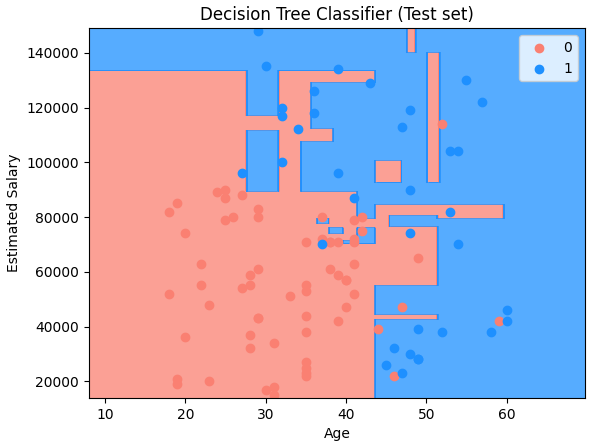

In [14]:
random_forest_classifier = RandomForestClassifier(random_state = 0)
random_forest_classifier.fit(X_train, y_train)

evaluate(random_forest_classifier, "Random Forest Classifier")
visualize(random_forest_classifier, "Random Forest Classifier")

------------ Random Forest Classifier ------------

1. Prediction for (27 Age, 84000 Salary): [0]

2. y_predicted: 
[1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0]

3. Confusion matrix: 
[[57 11]
 [ 5 27]]

4. Accuracy score: 0.84

5. Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        68
           1       0.71      0.84      0.77        32

    accuracy                           0.84       100
   macro avg       0.81      0.84      0.82       100
weighted avg       0.85      0.84      0.84       100




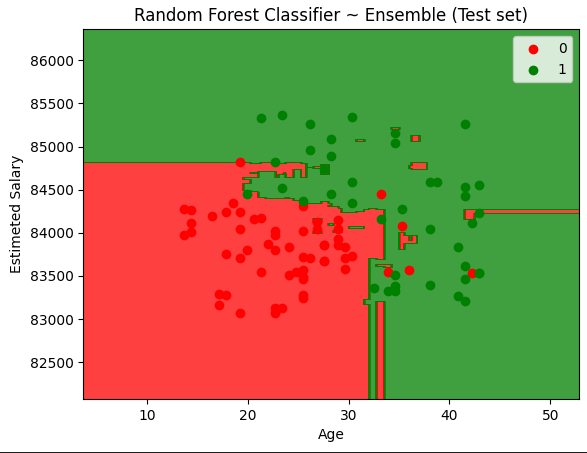